In [1]:
from maiagomes.models.options.pricing import Option_pricing_simulator

In [2]:
from maiagomes.models.mmar.montecarlo import MMAR_simulator_handler
import json

mmar_results=json.load(
        open(
          "../../results/mmar/latest_results.json",
            "rb",
        )
    )
cached_samples_folder = "../../results/simulated_paths/simulations"
ticker_symbol = "PLUG"
expiration_date = "2025-02-21"
min_thr = 390
minutes_until_expiration = 4000
simulator = MMAR_simulator_handler(
    mmar_results[ticker_symbol], T=minutes_until_expiration, 
)
simulator.prep(parallel=True)

In [3]:
simulator.simulator.get_dict()

<Axes: xlabel='t', ylabel='mmar'>

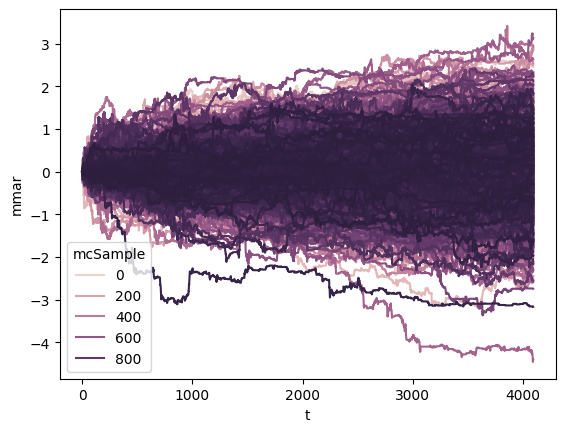

In [4]:
import seaborn as sns
sns.lineplot(simulator.simulator.df(), x = 't',y = 'mmar',hue = 'mcSample')

In [5]:
%run ../../src/maiagomes/models/options/pricing.py

In [9]:
ops = Option_pricing_simulator(simulator=simulator)

In [10]:
ops.define(ticker_symbol='PLUG', expiration_date="2025-03-07")

In [11]:
aa = ops.assess_contracts(ops.get_k_distance_contract(3))

In [54]:
aa

{'PLUG250221C00003000+PLUG250221P00000500': {'expected_return': 127.69583333333331,
  'expiration_date': '2025-02-21',
  'variance': 49765.60477180556,
  'expected_lower_bound': 0.01751040296993947,
  'expected_upper_bound': 931230.7591485847,
  'probability': 0.278,
  'kelly_c': 0.2723013121978492,
  'kelly_c_50': 0.32808958208358335,
  'kelly_c_100': 0.502024897510249,
  'exposure': 0.02166,
  'kelly_c_area': -644.1305656296042,
  'kelly_divergency': 771.8263989629376,
  'cost': 0.03,
  'lastTradeDate': Timestamp('2025-01-06 18:58:12+0000', tz='UTC'),
  'type': 'put+call'},
 'PLUG250221C00003000': {'expected_return': 127.49816666666665,
  'expiration_date': '2025-02-21',
  'variance': 49811.08541293888,
  'expected_lower_bound': 0.017470168006698338,
  'expected_upper_bound': 930488.0466592141,
  'probability': 0.278,
  'kelly_c': 0.2722924073998438,
  'kelly_c_50': 0.28009598080383924,
  'kelly_c_100': 0.4680265973402659,
  'exposure': 0.01444,
  'kelly_c_area': -711.0875985204813,


In [45]:
bb = ops.assess_contracts(ops.get_k_distance_contract(3), use_moving_average=False)

/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:258: RuntimeWarning: divide by zero encountered in log
  np.log(S) + mat + np.log(norm.cdf(-d1))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/mmar/montecarlo.py:258: RuntimeWarning: divide by zero encountered in log
  np.log(S) + mat + np.log(norm.cdf(-d1))
/Users/guilhermegomes/Documents/maiagomes/maiagomes/src/maiagomes/models/options/pricing.py:110: RuntimeWarning: divide by zero encountered in log
  option_mat = np.nan_to_num(np.log(option_mat) - np.log(option_mat[0, 0]))


In [46]:
bb

{'PLUG250221C00003000+PLUG250221P00000500': {'expected_return': 129.02749999999997,
  'expiration_date': '2025-02-21',
  'variance': 50140.90288258334,
  'expected_lower_bound': 0.01758402246585555,
  'expected_upper_bound': 946774.0267380226,
  'probability': 0.273,
  'kelly_c': 0.2673215324832556,
  'exposure': 0.02181,
  'kelly_c_area': -595.8338326101851,
  'kelly_divergency': 724.8613326101852,
  'cost': 0.03,
  'lastTradeDate': Timestamp('2025-01-06 18:58:12+0000', tz='UTC'),
  'type': 'put+call'},
 'PLUG250221C00003000': {'expected_return': 128.7528333333333,
  'expiration_date': '2025-02-21',
  'variance': 50205.38515920556,
  'expected_lower_bound': 0.017528053983084792,
  'expected_upper_bound': 945757.7040416889,
  'probability': 0.274,
  'kelly_c': 0.2683171514787017,
  'exposure': 0.01452,
  'kelly_c_area': -682.9107517710571,
  'kelly_divergency': 811.6635851043904,
  'cost': 0.02,
  'lastTradeDate': Timestamp('2025-02-07 16:55:09+0000', tz='UTC'),
  'type': 'call'},
 'PL

In [74]:
aa

{'GOOGL240315P00133000+GOOGL240315C00134000': {'expected_return': 1.8446666666666665,
  'variance': 35.05545488888888,
  'expected_lower_bound': 0.09896222898816327,
  'expected_upper_bound': 34.38478645744841,
  'probability': 0.157,
  'kelly_c': -0.8410268350434098,
  'exposure': 3.8356500000000007,
  'cost': 4.550000000000001},
 'GOOGL240315P00133000': {'expected_return': 2.0644583333333326,
  'variance': 48.61638678993056,
  'expected_lower_bound': 0.08463515981733755,
  'expected_upper_bound': 50.35718275085439,
  'probability': 0.109,
  'kelly_c': -0.7280454456491962,
  'exposure': 1.9958400000000003,
  'cost': 2.24},
 'GOOGL240315C00134000': {'expected_return': 1.1086666666666665,
  'variance': 43.09069155555556,
  'expected_lower_bound': 0.05019265927655222,
  'expected_upper_bound': 24.488476910646096,
  'probability': 0.053,
  'kelly_c': -8.661723926380382,
  'exposure': 2.18757,
  'cost': 2.31}}

In [53]:
np.exp(norm.ppf(.05,np.log(1.1086666666666665),np.log(np.sqrt(43.09069155555556))))

0.05019265927655222

In [52]:
norm.ppf(.05,1.1086666666666665,np.sqrt(43.09069155555556))

-9.68872831872578